## Importing Important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

## Load the data

In [2]:
data = pd.read_csv("netflix_titles.csv")

## EDA and Data analysis

In [3]:
data.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [4]:
data.shape

(8807, 12)

In [5]:
data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
data.describe().T

count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0

In [10]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

In [11]:
data[data.duplicated()].sum()

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [12]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Missing value percentage in each columns

In [13]:
def missing_percentage(data):
    # Calculate missing value and their percentage for each column
    
    missing_count_percent = data.isnull().sum() * 100 / data.shape[0]
    
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = data.isnull().sum()
    
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    
    # Sort the data frame

    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    
    return Final

missing_percentage(data)

Column  Missing_value_count  Missing_Percentage (%)
3       director                 2634                   29.91
5        country                  831                    9.44
4           cast                  825                    9.37
6     date_added                   10                    0.11
8         rating                    4                    0.05
9       duration                    3                    0.03
0        show_id                    0                    0.00
1           type                    0                    0.00
2          title                    0                    0.00
7   release_year                    0                    0.00
10     listed_in                    0                    0.00
11   description                    0                    0.00

## handling missing values

In [14]:
# replace blank countries with the mode (most common) country
# I want to keep director as it could be interesting to look at a certain director's films
# I want to keep cast as it could be interesting to look at a certain cast's films

data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)

In [15]:
missing_percentage(data)

Column  Missing_value_count  Missing_Percentage (%)
6     date_added                   10                    0.11
8         rating                    4                    0.05
9       duration                    3                    0.03
0        show_id                    0                    0.00
1           type                    0                    0.00
2          title                    0                    0.00
3       director                    0                    0.00
4           cast                    0                    0.00
5        country                    0                    0.00
7   release_year                    0                    0.00
10     listed_in                    0                    0.00
11   description                    0                    0.00

In [16]:
data.shape

(8807, 12)

In [17]:
# Drops Null

data.dropna(inplace=True)

# Drop Duplicates

data.drop_duplicates(inplace= True)

In [18]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
data.shape

(8790, 12)

In [20]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...

## deal with the date

In [21]:
data["date_added"] = pd.to_datetime(data['date_added'])

data['month_added']= data['date_added'].dt.month
data['month_name_added']= data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year
data.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   
2  To protect his family from a powerful drug lor...            9   

  month_name_added  year_added  
0        September        2021  
1        September        2021  
2        September        2021

In [22]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
data['rating'].nunique()

14

In [24]:
# show which is target mostly focused by productions
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [25]:
data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [26]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  
0        September        2021       Teens  
1        September        2021      Adults

#### Fix data types

In [27]:
data.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
target_ages                 object
dtype: object

In [28]:
# type should be a category
data['type'] = pd.Categorical(data['type'])

In [29]:
# target_ages is another category (4 classes)
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
data['year_added'] = pd.to_numeric(data['year_added'])

In [30]:
data['date_added'] = data['date_added'].astype('object')

In [31]:
data.dtypes

show_id               object
type                category
title                 object
director              object
cast                  object
country               object
date_added            object
release_year           int64
rating                object
duration              object
listed_in             object
description           object
month_added            int64
month_name_added      object
year_added             int64
target_ages         category
dtype: object

In [32]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  
0        September        2021       Teens  
1        September        2021      Adults

#### General information about the dataset

In [33]:
# Show ID for Breaking Bad series
data[data["title"] == "Breaking Bad"].show_id

5940    s5941
Name: show_id, dtype: object

In [34]:
# The cast of Breaking Bad
data[data["title"] == "Breaking Bad"].cast

5940    Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...
Name: cast, dtype: object

In [35]:
# The duration of House of Cards
data[data["title"] == "Breaking Bad"].duration

5940    5 Seasons
Name: duration, dtype: object

In [36]:
data["release_year"].value_counts()

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [37]:
data.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
2  2021-09-24 00:00:00          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   
2  To protect his family from a powerful drug lor...            9   

  month_name_added  year_added target_ages  
0        September        2021       Teens  
1        September        2021      Adults  
2        September        2021      Adults

In [38]:
data["year_added"].value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [39]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  
0        September        2021       Teens  
1        September        2021      Adults

In [40]:
# All movies released in 2020
data[(data['type'] == "Movie") & (data['release_year'] == 2020)].head(3)

show_id   type                                              title  \
0       s1  Movie                               Dick Johnson Is Dead   
16     s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
78     s79  Movie                                     Tughlaq Durbar   

                                         director  \
0                                 Kirsten Johnson   
16  Pedro de Echave García, Pablo Azorín Williams   
78                       Delhiprasad Deenadayalan   

                                          cast        country  \
0                                      No Data  United States   
16                                     No Data  United States   
78  Vijay Sethupathi, Parthiban, Raashi Khanna  United States   

             date_added  release_year rating duration  \
0   2021-09-25 00:00:00          2020  PG-13   90 min   
16  2021-09-22 00:00:00          2020  TV-MA   67 min   
78  2021-09-11 00:00:00          2020  TV-14  145 min   

                                 listed_in  \
0                            Documentaries   
16     Documentaries, International Movies   
78  Comedies, Dramas, International Movies   

                                          description  month_added  \
0   As her father nears the end of his life, filmm...            9   
16  Declassified documents reveal the post-WWII li...            9   
78  A budding politician has devious plans to rise...            9   

   month_name_added  year_added target_ages  
0         September        2021       Teens  
16        September        2021      Adults  
78        September        2021       Teens

In [41]:
# The title of all TV Shows from Spain
data[(data['type'] == "TV Show") & (data['country'] == "Spain")]['title'].head()

109    La casa de papel
276             Valeria
401            Sky Rojo
664       Cleo & Cuquin
669           Locked Up
Name: title, dtype: object

In [42]:
# The 10 most directors who have directed Movies and series
data['director'].value_counts().head(11)

No Data                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Steven Spielberg            11
Name: director, dtype: int64

In [43]:
# all Comedies Movies OR any this produced in United Kingdom
data[(data['type'] == 'Movie') & (data['listed_in'].isin(['Comedies'])) | (data['country'] == 'United Kingdom')].head(2)

show_id     type                          title         director  \
8       s9  TV Show  The Great British Baking Show  Andy Devonshire   
27     s28    Movie                      Grown Ups     Dennis Dugan   

                                                 cast         country  \
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
27  Adam Sandler, Kevin James, Chris Rock, David S...   United States   

             date_added  release_year rating   duration  \
8   2021-09-24 00:00:00          2021  TV-14  9 Seasons   
27  2021-09-20 00:00:00          2010  PG-13    103 min   

                       listed_in  \
8   British TV Shows, Reality TV   
27                      Comedies   

                                          description  month_added  \
8   A talented batch of amateur bakers face off in...            9   
27  Mourning the loss of their beloved junior high...            9   

   month_name_added  year_added target_ages  
8         September        2021       Teens  
27        September        2021       Teens

In [44]:
# The Only TV Show has R rating and added after 2018 is The Hateful eight.
# which is mistake because it is a movie not a TV Show !!
data[(data['type'] == 'TV Show') & (data['rating'] == 'R') & (data['year_added'] > 2018)]

show_id     type                                title           director  \
3893   s3894  TV Show  The Hateful Eight: Extended Version  Quentin Tarantino   

                                                   cast        country  \
3893  Samuel L. Jackson, Kurt Russell, Jennifer Jaso...  United States   

               date_added  release_year rating  duration listed_in  \
3893  2019-04-25 00:00:00          2015      R  1 Season  TV Shows   

                                            description  month_added  \
3893  Trapped at a stagecoach stop as a storm rages ...            4   

     month_name_added  year_added target_ages  
3893            April        2019      Adults

In [45]:
# All Movies produced in Canada and their rating is TV-14
data[(data['type'] == 'Movie') & (data['rating'] == 'TV-14') & (data['country'] == "Canada")]['title']

157                                        Level 16
1279     Made You Look: A True Story About Fake Art
2769                 There's Something in the Water
3424    Martin Matte: La vie, la mort...eh la la..!
5972                               #cats_the_mewvie
5973                                          #Roxy
6192                                 At First Light
6537                     Counterfeiting in Suburbia
7334                              Long Time Running
7916                     Sadie's Last Days on Earth
7936                                     Sardaar ji
8178                    The Accountant of Auschwitz
8566                           The Wrong Babysitter
Name: title, dtype: object

In [46]:
data['duration'].nunique()

220

In [47]:
data[["min",'unit']] = data['duration'].str.split(" ",expand=True)

In [48]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages min     unit  
0        September        2021       Teens  90      min  
1        September        2021      Adults   2  Seasons

In [49]:
data['min'] = pd.to_numeric(data['min'], errors='coerce')

In [50]:
# Longest Movie
data[data['min'] == data['min'].max()]

show_id   type                       title director  \
4253   s4254  Movie  Black Mirror: Bandersnatch  No Data   

                                                   cast        country  \
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

               date_added  release_year rating duration  \
4253  2018-12-28 00:00:00          2018  TV-MA  312 min   

                                           listed_in  \
4253  Dramas, International Movies, Sci-Fi & Fantasy   

                                            description  month_added  \
4253  In 1984, a young programmer begins to question...           12   

     month_name_added  year_added target_ages  min unit  
4253         December        2018      Adults  312  min

In [51]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  min     unit  
0        September        2021       Teens   90      min  
1        September        2021      Adults    2  Seasons

In [52]:
# longest TV Show
data[(data['unit'] == 'Seasons') | (data['unit'] == "Season")]['min'].max()

17

In [53]:
# It's Grey's Anatomy!
data[(data['min'] == 17) & (data['unit'] == 'Seasons')]

show_id     type           title director  \
548    s549  TV Show  Grey's Anatomy  No Data   

                                                  cast        country  \
548  Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...  United States   

              date_added  release_year rating    duration  \
548  2021-07-03 00:00:00          2020  TV-14  17 Seasons   

                        listed_in  \
548  Romantic TV Shows, TV Dramas   

                                           description  month_added  \
548  Intern (and eventual resident) Meredith Grey f...            7   

    month_name_added  year_added target_ages  min     unit  
548             July        2021       Teens   17  Seasons

In [54]:
# Shortest TV Show
data[(data['unit'] == 'Seasons') | (data['unit'] == "Season")]['min'].min()

1

In [55]:
# 1793 TV-shows has only 1 season
data[(data['min'] == 1) & (data['unit'] == 'Season')]['title'].agg('count')

1791

In [56]:
# Shortest Movie
data[(data['unit'] == 'min')]['min'].min()

3

In [57]:
# Shortest Movie
data[(data['unit'] == 'min') & (data['min'] == 3)]

show_id   type   title                           director     cast  \
3777   s3778  Movie  Silent  Limbert Fabian, Brandon Oldenburg  No Data   

            country           date_added  release_year rating duration  \
3777  United States  2019-06-04 00:00:00          2014   TV-Y    3 min   

                                       listed_in  \
3777  Children & Family Movies, Sci-Fi & Fantasy   

                                            description  month_added  \
3777  "Silent" is an animated short film created by ...            6   

     month_name_added  year_added target_ages  min unit  
3777             June        2019        Kids    3  min

In [58]:
# Top 5 countries
data['country'].value_counts().head()

United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Name: country, dtype: int64

In [59]:
# oldest 3 movies or TV-Shows released
old = data.sort_values("release_year", ascending = True)
old[['title', "release_year"]][:10]

title  release_year
4250                 Pioneers: First Women Filmmakers*          1925
7790                                    Prelude to War          1942
8205                              The Battle of Midway          1942
8763                   WWII: Report from the Aleutians          1943
8739                Why We Fight: The Battle of Russia          1943
8660     Undercover: How to Operate Behind Enemy Lines          1943
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944
8640                                  Tunisian Victory          1944
8436                                 The Negro Soldier          1944
7575                          Nazi Concentration Camps          1945

In [60]:
# Newest 3 movies or TV-Shows released
new = data.sort_values("release_year", ascending = False)
new[['title', "release_year"]][:10]

title  release_year
693                 Ali & Ratu Ratu Queens          2021
781  Black Holes | The Edge of All We Know          2021
762                           Sweet & Sour          2021
763                            Sweet Tooth          2021
764           Trippin' with the Kandasamys          2021
765                                 Xtreme          2021
766                Alan Saldaña: Locked Up          2021
767                   Creator's File: GOLD          2021
768                         Dancing Queens          2021
770              Myriam Fares: The Journey          2021

In [61]:
# Number of Drama Movies
data[(data['type'] == "Movie") & (data['listed_in'] == 'Dramas')]['title'].agg('count')

137

In [62]:
# Number of Kids' TV TV Show
data[(data['type'] == "TV Show") & (data['listed_in'] == "Kids' TV")]['title'].agg('count')

219

In [63]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water          No Data   

                                                cast        country  \
0                                            No Data  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  min     unit  
0        September        2021       Teens   90      min  
1        September        2021      Adults    2  Seasons

## Data Visualization

#### Make movies data & TV Show data.

In [64]:
movies = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

In [65]:
data['genre'] = data['listed_in'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(',')) 
data['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

#### Content Type on Netflix

In [66]:
col = "type"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#7eb0d5", "#fd7f6f"]))
layout = go.Layout(title="", height=500, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

#### Growth in content over the years

In [67]:
col = "year_added"

vc1 = tv_show[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#7eb0d5"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#fd7f6f"))
data1 = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data1, layout=layout)
fig.show()

In [68]:
col = "release_year"

vc1 = tv_show[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#7eb0d5"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#fd7f6f"))
data1 = [trace1, trace2]
layout = go.Layout(title="Content released over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data1, layout=layout)
fig.show()

#### Number of Content Released by Year

In [69]:
release = data['release_year'].value_counts()
release = release.sort_index(ascending=True)

# Filter the top 10 years with the most content releases
top_years = release[-11:-1]

df = pd.DataFrame({'Year': top_years.index, 'Number of Content Released': top_years.values})

# Create the line plot using Plotly Express
fig = px.line(df, x='Year', y='Number of Content Released',
              title='Number of Content Releases by Year')

# Customize the appearance of the plot
fig.update_traces(line=dict(color='#7eb0d5', width=2))
fig.update_xaxes(title="Year", tickfont=dict(size=12), showgrid=False)
fig.update_yaxes(title="Number of Content Released")

# Add scatter points with variable size to highlight data points
fig.add_scatter(x=df['Year'], y=df['Number of Content Released'], 
                mode='markers', marker=dict(size=0.02*df['Number of Content Released'], color='#fd7f6f'),
                name='Data Points')

# Show the plot
fig.show()


#### Trends of Movie's Duration over the Years

In [70]:
duration_year = movies.groupby(['release_year']).mean(numeric_only=True)
duration_year = duration_year.sort_index().reset_index()

fig = px.line(duration_year, x='release_year', y='min', title="Trends of Movie's Duration over the Years")

fig.update_traces(line=dict(color='#fd7f6f', width=2))
fig.update_xaxes(title="Year of release", showgrid=False)
fig.update_yaxes(title="Movie duration in minutes")

fig.show()

#### The ratings of the content

In [71]:
col = "rating"

vc1 = tv_show[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#7eb0d5"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#fd7f6f"))
data1 = [trace1, trace2]
layout = go.Layout(title="The ratings of the content", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

#### Top Categories (Movies & TV-Shows)

In [72]:
col = "listed_in"
categories = ", ".join(movies['listed_in']).split(", ")
counter_list = Counter(categories).most_common(11)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color="#fd7f6f"))

data1 = [trace1]
layout = go.Layout(title="Top Categories (Movies)", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

In [73]:
col = "listed_in"
categories = ", ".join(tv_show['listed_in']).split(", ")
counter_list = Counter(categories).most_common(11)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color="#7eb0d5"))

data1 = [trace1]
layout = go.Layout(title="Top Categories (TV-Shows)", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

#### Top Country Produced ( Movies & TV-Shows )

In [74]:
col = "country"
categories = ", ".join(movies['country']).split(", ")
counter_list = Counter(categories).most_common(11)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color="#fd7f6f"))

data1 = [trace1]
layout = go.Layout(title="Top Categories (Movies)", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

In [75]:
col = "country"
categories = ", ".join(tv_show['country']).split(", ")
counter_list = Counter(categories).most_common(11)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", marker=dict(color="#7eb0d5"))

data1 = [trace1]
layout = go.Layout(title="Top Categories (TV-Shows)", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

In [76]:
top_countries = [
    "United States",
    "India",
    "United Kingdom",
    "Japan",
    "South Korea",
    "Canada",
    "Spain",
    "France",
]

# Filter the data for the specified top countries
top_8_tv_shows = tv_show[tv_show['country'].isin(top_countries)]['country'].value_counts()
top_8_movies = movies[movies['country'].isin(top_countries)]['country'].value_counts()

trace1 = go.Bar(x=top_8_tv_shows.index, y=top_8_tv_shows.values, name="TV Shows", marker=dict(color="#7eb0d5"))
trace2 = go.Bar(x=top_8_movies.index, y=top_8_movies.values, name="Movies", marker=dict(color="#fd7f6f"))

data1 = [trace1, trace2]

layout = go.Layout(title="Top 8 Countries with the Most TV Shows and Movies",
                   xaxis=dict(title="Country"),
                   yaxis=dict(title="Count"),
                   legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data=data1, layout=layout)
fig.show()


#### Target age distribution by Type of content

In [77]:
def generate_rating_data(data):
    rating_data = data.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_data = rating_data[rating_data['show_id'] != 0]
    rating_data.columns = ['rating', 'target_ages', 'counts']
    rating_data = rating_data.sort_values('target_ages')
    return rating_data

In [78]:
movie_rating_df = generate_rating_data(movies)
show_rating_df = generate_rating_data(tv_show)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.45, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Target age distribution by Type of content",

    annotations=[dict(text='Movies', x=0.195, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

#### Distribution of TV Show Durations

In [79]:
fig = px.histogram(x=tv_show['min'], labels={'min': 'Duration (minutes)'})

# Update axis formatting
fig.update_xaxes(title_text="Number of Seasons", categoryorder="total descending")
fig.update_yaxes(title_text="Frequency")

fig.update_layout(
    title="Distribution of TV Show Durations",bargap=0.1, margin=dict(l=50, r=50, b=50, t=50))
fig.update_traces(marker_color='#7eb0d5')
fig.show()

#### Distribution of Movies Durations

In [80]:
bin_edges = [0, 90, 150, float('inf')]  # In minutes

movies['duration_category'] = pd.cut(movies['min'], bins=bin_edges, labels=['<1.5 hours', '1.5-2.5 hours', '>2.5 hours'])

category_counts = movies['duration_category'].value_counts().reset_index()

category_counts.columns = ['Duration Category', 'Number of Movies']

fig = px.bar(category_counts, x='Duration Category', y='Number of Movies', 
             title='Number of Movies in Different Duration',
             labels={'Number of Movies': 'Number of Movies'},
            color_discrete_sequence=['#fd7f6f'])

fig.show()

C:\Users\Orange\AppData\Local\Temp\ipykernel_1596\530181837.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### WordCloud

In [81]:
description_mov = ''.join(movies['description'])
description_tv  = ''.join(tv_show['description'])

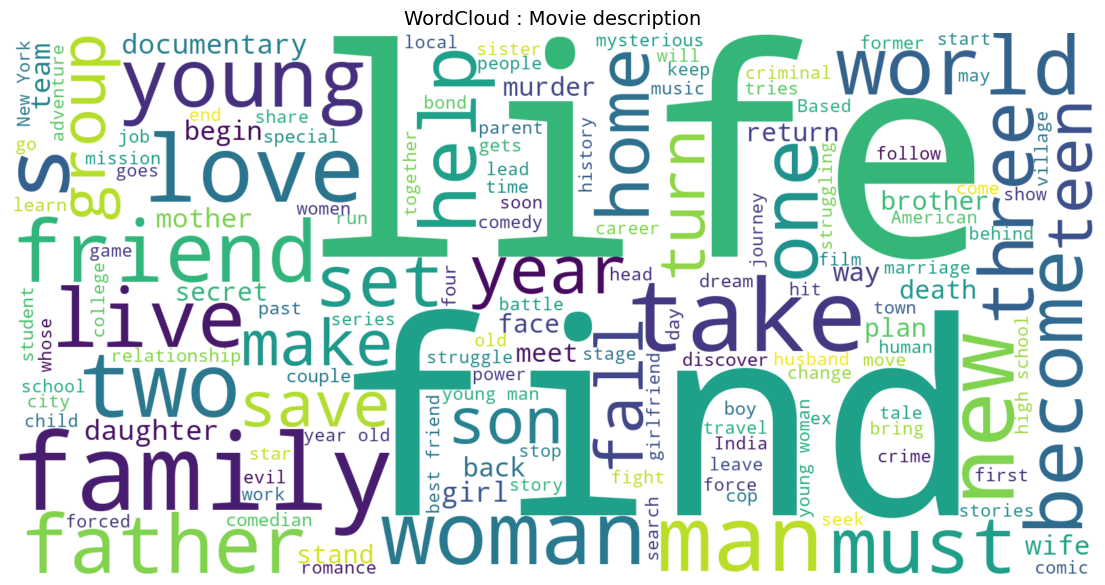

In [82]:
# For movies

plt.figure(figsize=(14,14))

wordcloud1 = WordCloud(max_words=150,
                       background_color="white",
                       width=1600, height=800).generate(description_mov)

plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud : Movie description', fontsize = 14)
plt.show()

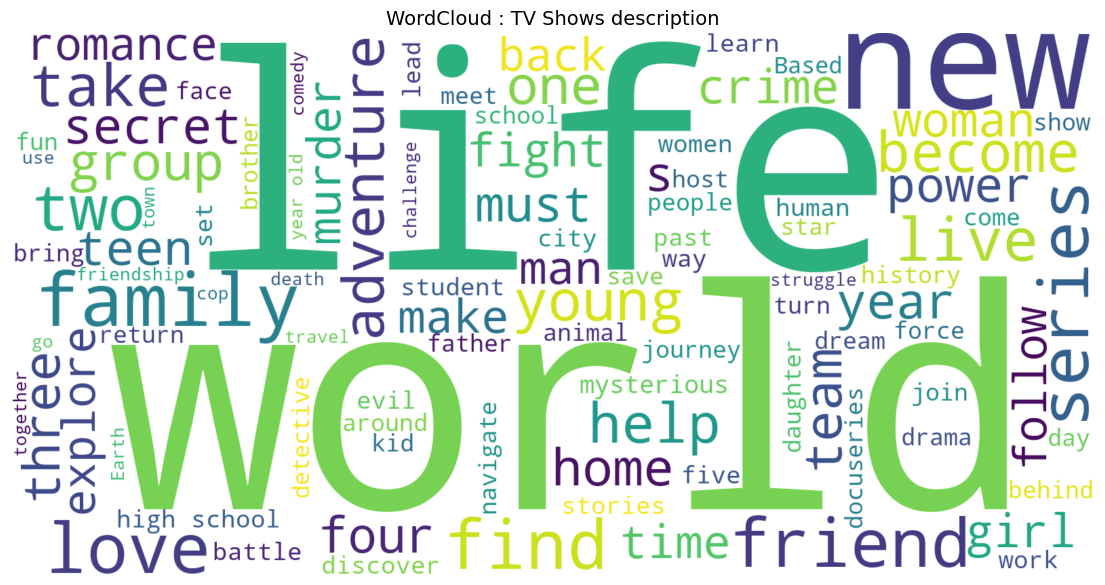

In [83]:
# For TV Shows

plt.figure(figsize=(14,14))

wordcloud2 = WordCloud(max_words=100,
                       background_color="white",
                       width=1600, height=800,).generate(description_tv)

plt.imshow(wordcloud2,interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud : TV Shows description', fontsize = 14)
plt.show()

## Prepare the data for the Recommendation System

#### Create a New Columns (text) include (title, director, cast, listed_in, description, and target_ages) to use their info for Recommendation System

In [84]:
# Put empty instead of "No Data" in director and cast columns.
data['director'] = data['director'].replace('No Data', '')

data['cast'] = data['cast'].replace('No Data', '')

# Change the type of target_ages to object
data['target_ages'] = data['target_ages'].astype("object")

In [85]:
data['text'] = data['title'] + ' ' + data['director'] + ' ' + data['cast'] + ' ' + data['listed_in'] + ' ' + data['description'] + ' ' + data['target_ages']

In [86]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water                    

                                                cast        country  \
0                                                     United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  min     unit  \
0        September        2021       Teens   90      min   
1        September        2021      Adults    2  Seasons   

                                               genre  \
0                                    [Documentaries]   
1  [International TV Shows, TV Dramas, TV Mysteries]   

                                                text  
0  Dick Johnson Is Dead Kirsten Johnson  Document...  
1  Blood & Water  Ama Qamata, Khosi Ngema, Gail M...

#### Preprocess "text" Column (title, director, cast, listed_in, description, and target_ages)

In [87]:
#Python function used to preprocess text data
def preprocess(text):
    
    #Remove all non-alphabetical characters and replaces them with a space character
    text = re.sub('[^A-z]', ' ', text)
    
    #Collection of English stopwords (e.g., "the," "is," "in")
    stop_words = set(stopwords.words('english'))  
    
    #Tokenization involves splitting the text into individual words or tokens.
    word_tokens = word_tokenize(text)
    
    #Lemmatization is the process of reducing words to their base or dictionary form (e.g., "running" to "run")
    lemmatizer = nltk.stem.WordNetLemmatizer()

    filtered_sentence = []  
    
    for word in word_tokens:  
        if word not in stop_words:  
            filtered_sentence.append(lemmatizer.lemmatize(word))
    
    filtered = ' '.join([x for x in filtered_sentence])
    return filtered.lower().strip()

In [88]:
# Apply Preprocess on Text column
data['text'] = data['text'].apply(lambda x : preprocess(x))

In [89]:
data.head(2)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water                    

                                                cast        country  \
0                                                     United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  month_added  \
0  As her father nears the end of his life, filmm...            9   
1  After crossing paths at a party, a Cape Town t...            9   

  month_name_added  year_added target_ages  min     unit  \
0        September        2021       Teens   90      min   
1        September        2021      Adults    2  Seasons   

                                               genre  \
0                                    [Documentaries]   
1  [International TV Shows, TV Dramas, TV Mysteries]   

                                                text  
0  dick johnson is dead kirsten johnson documenta...  
1  blood water ama qamata khosi ngema gail mabala...

## Save the new data as a new CSV file to build the Recommendation System

In [90]:
# csv_file_path = 'netflix_recommendation.csv'
# data.to_csv(csv_file_path, index=False)